<a href="https://colab.research.google.com/github/rohit-dudhal/Stock_Price_Prediction/blob/master/Googel_Stock(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Use of ANN
#LSTM(Long Short Term Memory) for sequenial predictions problems
#able to store past prdiction

In [0]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [82]:
#getting stock
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2019-12-17')
#displaying data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [83]:
#getting number of rows and columns
df.shape

(2003, 6)

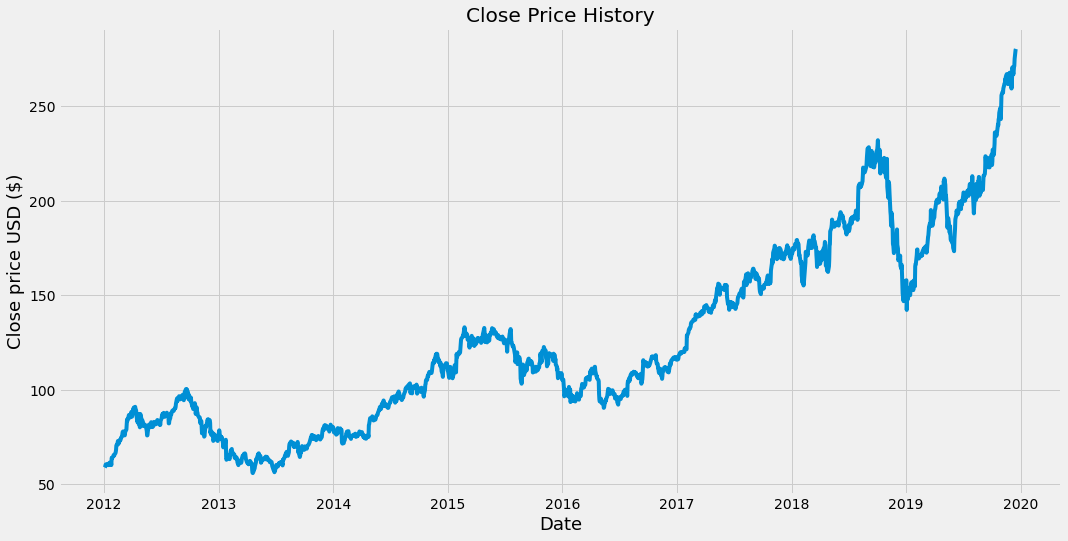

In [84]:
#visualizeing closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [85]:
#creating new dataframw for 'Close'column
data=df.filter(['Close'])
#converting dataset to numpy array
dataset=data.values
#taining rows model number
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1603

In [86]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [88]:
#creating scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#spliting data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [0]:
#convert x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [90]:
x_train.shape

(1543, 60)

In [91]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [0]:
#building the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 116s 75ms/step - loss: 9.1860e-04


In [0]:
#NOw creating testing dataset
#creating array scaled values from 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#creating dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert data to numpy array
x_test = np.array(x_test)

In [0]:
#reshapeing data to 3D model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#get the predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [103]:
#to evaluatng
#gettong root mean square error(RMSE) to check better fit to know accracy
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.98278884763099

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


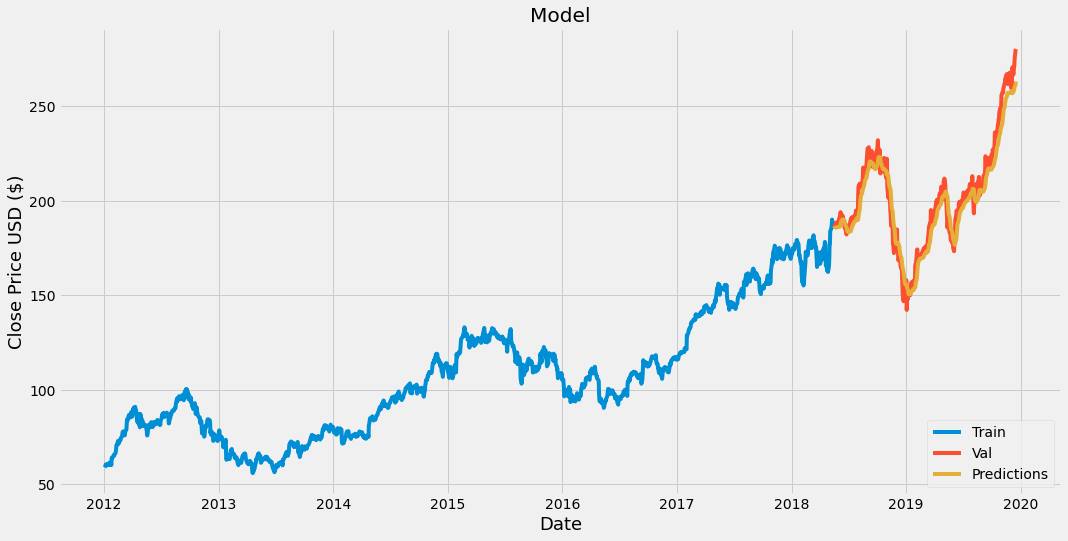

In [104]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [105]:
#showimg actual price
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,185.260162
2018-05-18,186.309998,185.607437
2018-05-21,187.630005,185.684387
2018-05-22,187.160004,185.745956
2018-05-23,188.360001,185.745621
...,...,...
2019-12-11,270.769989,258.671387
2019-12-12,271.459991,259.465698
2019-12-13,275.149994,260.334656


In [106]:
apple_quote=web.DataReader('AAPL' ,data_source='yahoo',start='2012-01-01', end='2019-12-17')
#creating a new dataframe
new_df=apple_quote.filter(['Close'])
#getting 60 day closing price values and converting the dataframeto an array
last_60_days=new_df[-60:].values
#scale the data to values between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
# creating an empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#converting X_test to numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predidcted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[264.94125]]


In [109]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
